In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import seaborn as sns

In [ ]:
#data
data = pd.read_csv("https://raw.githubusercontent.com/maebryant/MBryant/main/KAG_conversion_data.csv")
data = data.dropna()

data = pd.get_dummies(data, columns = ["xyz_campaign_id", 'age'])
data['gender'] = pd.factorize(data['gender'])[0] #0 = Male, 1 = Female

data.head()

,ad_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,xyz_campaign_id_916,xyz_campaign_id_936,xyz_campaign_id_1178,age_30-34,age_35-39,age_40-44,age_45-49
0,708746,103916,0,15,7350,1,1.43,2,1,1,0,0,1,0,0,0
1,708749,103917,0,16,17861,2,1.82,2,0,1,0,0,1,0,0,0
2,708771,103920,0,20,693,0,0.00,1,0,1,0,0,1,0,0,0
3,708815,103928,0,28,4259,1,1.25,1,0,1,0,0,1,0,0,0
4,708818,103928,0,28,4133,1,1.29,1,1,1,0,0,1,0,0,0


## Question 1:
Which variable (spent, clicks, impressions) improves the model the most in terms of R2 values for number of total conversions?

In [ ]:
#set predictors
predictors = ["ad_id", "xyz_campaign_id_916","xyz_campaign_id_936", "xyz_campaign_id_1178", "fb_campaign_id", "age_30-34", "age_35-39", "age_40-44", "age_45-49",
              "interest", "Impressions", "Clicks", "Spent", "Approved_Conversion"]

X = data[predictors]
y = data["Total_Conversion"]

# TTS 90/10
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["Total_Conversion"], test_size=0.2)

#z-score
z = StandardScaler()

z.fit(data[["Clicks", "Spent", "interest", "Impressions", "Approved_Conversion"]])

z.transform(data[["Clicks", "Spent", "interest", "Impressions", "Approved_Conversion"]])


array([[-0.5695727 , -0.57477185, -0.6594722 , -0.57379269,  0.03223643],
       [-0.55198797, -0.57028241, -0.62235314, -0.54017097, -0.54348614],
       [-0.58715742, -0.59123316, -0.47387691, -0.59508655, -0.54348614],
       ...,
       [-0.09478519, -0.12743878,  2.90395744, -0.11259846, -0.54348614],
       [ 1.7867801 ,  1.69619753,  2.97819555,  1.9304925 ,  0.60795901],
       [ 1.41750093,  1.31517011,  3.01531461,  1.04415359,  0.60795901]])

In [ ]:
#model #1- all predictors minus spent, clicks and impressions
predictors = ["ad_id", "xyz_campaign_id_916","xyz_campaign_id_936", "xyz_campaign_id_1178", "fb_campaign_id", "age_30-34", "age_35-39", "age_40-44", "age_45-49",
              "interest", "Approved_Conversion"]

X = data[predictors]
y = data["Total_Conversion"]

#TTS
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["Total_Conversion"], test_size=0.2)

#z-score
z = StandardScaler()

z.fit(data[["interest", "Approved_Conversion"]])
z.transform(data[["interest", "Approved_Conversion"]])


#model
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

#predicted vals
pred_vals_train = lr1.predict(X_train)
pred_vals_test = lr1.predict(X_test)


#metrics
print("model #1 train R2: ",lr1.score(X_train, y_train))
print("model #1 test R2: ",lr1.score(X_test, y_test))

#R2
test_model_1_R2 = lr1.score(X_test, y_test)
train_model_1_R2 = lr1.score(X_train, y_train)

model #1 train R2:  0.7682922410210776
model #1 test R2:  0.7418432808333939


In [ ]:
#model #2- all predictors in addition to the clicks
predictors = ["ad_id", "xyz_campaign_id_916","xyz_campaign_id_936", "xyz_campaign_id_1178", "fb_campaign_id", "age_30-34", "age_35-39", "age_40-44", "age_45-49",
              "interest", "Approved_Conversion", "Clicks"]

X = data[predictors]
y = data["Total_Conversion"]

#TTS
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["Total_Conversion"], test_size=0.2)

#z-score
z = StandardScaler()

z.fit(data[["Clicks", "interest", "Approved_Conversion"]])
z.transform(data[["Clicks", "interest", "Approved_Conversion"]])


#model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

#predicted vals
pred_vals_train = lr2.predict(X_train)
pred_vals_test = lr2.predict(X_test)


#metrics
print("model #2 train R2: ",lr2.score(X_train, y_train))
print("model #2 test R2: ", lr2.score(X_test, y_test))

#R2
test_model_2_R2 = lr2.score(X_test, y_test)
train_model_2_R2 = lr2.score(X_train, y_train)

model #2 train R2:  0.8184975513222634
model #2 test R2:  0.8233159863070348


In [ ]:
#model #3- all preductors in addition to the spent
predictors = ["ad_id", "xyz_campaign_id_916","xyz_campaign_id_936", "xyz_campaign_id_1178", "fb_campaign_id", "age_30-34", "age_35-39", "age_40-44", "age_45-49",
              "interest", "Approved_Conversion", "Spent"]

X = data[predictors]
y = data["Total_Conversion"]

#TTS
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["Total_Conversion"], test_size=0.2)

#z-score
z = StandardScaler()

z.fit(data[["Spent", "interest", "Approved_Conversion"]])
z.transform(data[[ "Spent", "interest", "Approved_Conversion"]])


#model
lr3 = LinearRegression()
lr3.fit(X_train, y_train)

#predicted vals
pred_vals_train = lr3.predict(X_train)
pred_vals_test = lr3.predict(X_test)


#metrics
print("model #3 train R2: ",lr3.score(X_train, y_train))
print("model #3 test R2: ", lr3.score(X_test, y_test))

#R2
test_model_3_R2 = lr3.score(X_test, y_test)
train_model_3_R2 = lr3.score(X_train, y_train)

model #3 train R2:  0.8354120004549039
model #3 test R2:  0.8056019884347998


In [ ]:
#model #4- all preductors in addition to the impressions
predictors = ["ad_id", "xyz_campaign_id_916","xyz_campaign_id_936", "xyz_campaign_id_1178", "fb_campaign_id", "age_30-34", "age_35-39", "age_40-44", "age_45-49",
              "interest", "Approved_Conversion", "Impressions"]

X = data[predictors]
y = data["Total_Conversion"]

#TTS
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data["Total_Conversion"], test_size=0.2)

#z-score
z = StandardScaler()

z.fit(data[["interest", "Impressions", "Approved_Conversion"]])
z.transform(data[["interest", "Impressions", "Approved_Conversion"]])

#model
lr4 = LinearRegression()
lr4.fit(X_train, y_train)

#predicted vals
pred_vals_train = lr4.predict(X_train)
pred_vals_test = lr4.predict(X_test)


#metrics
print("model #4 train R2: ",lr4.score(X_train, y_train))
print("model #4 test R2: ", lr4.score(X_test, y_test))

#R2
test_model_4_R2 = lr4.score(X_test, y_test)
train_model_4_R2 = lr4.score(X_train, y_train)


model #4 train R2:  0.8606880547194319
model #4 test R2:  0.8013150072966526


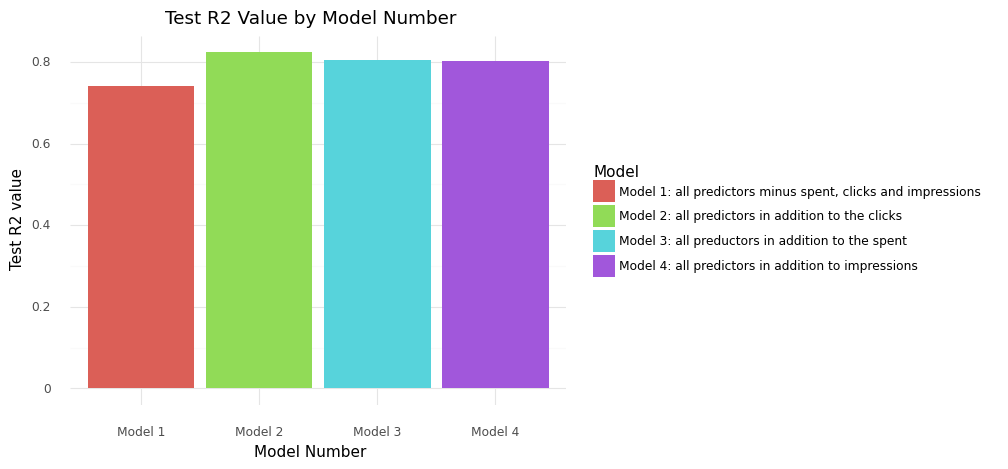

<ggplot: (8749511317757)>

In [ ]:
#DF for plot of test R2 values
test_R2_values = [test_model_1_R2, test_model_2_R2, test_model_3_R2, test_model_4_R2]
model_numbers = ["Model 1", "Model 2", "Model 3", "Model 4"]

coef = pd.DataFrame({"R2 Value": test_R2_values,
                     "Model Number": model_numbers})

#creatig plot
(ggplot(coef, aes(x = "Model Number", y = "R2 Value", fill = "Model Number"))
+ geom_bar(stat = "identity")
+ theme_minimal()
+ scale_fill_discrete(name = "Model", labels = ("Model 1: all predictors minus spent, clicks and impressions",
                                                "Model 2: all predictors in addition to the clicks", "Model 3: all preductors in addition to the spent",
                                                "Model 4: all predictors in addition to impressions"))
+labs(title = "Test R2 Value by Model Number",
   x = "Model Number",
   y = "Test R2 value"))


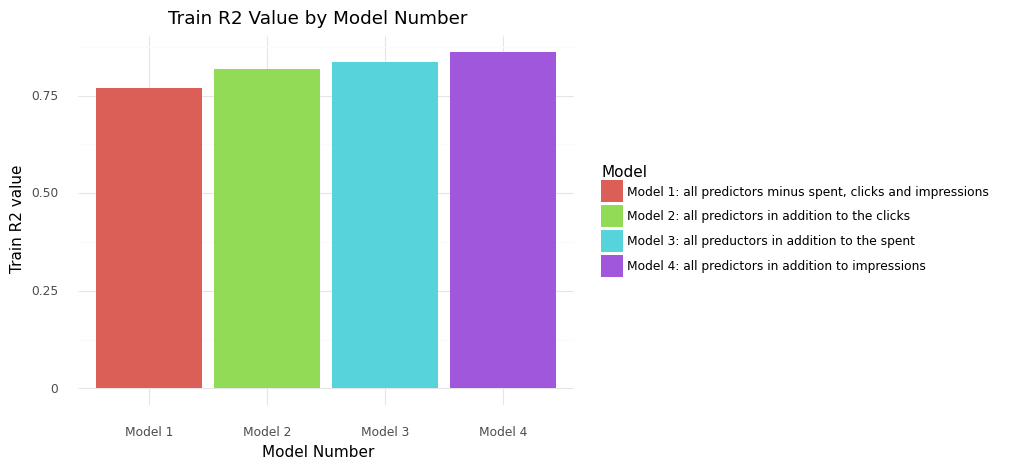

<ggplot: (8749511510794)>

In [ ]:
#DF for plot of train R2 values
train_R2_values = [train_model_1_R2, train_model_2_R2, train_model_3_R2, train_model_4_R2]
model_numbers = ["Model 1", "Model 2", "Model 3", "Model 4"]

coef = pd.DataFrame({"R2 Value": train_R2_values,
                     "Model Number": model_numbers})

#creatig plot
(ggplot(coef, aes(x = "Model Number", y = "R2 Value", fill = "Model Number"))
+ geom_bar(stat = "identity")
+ theme_minimal()
+ scale_fill_discrete(name = "Model", labels = ("Model 1: all predictors minus spent, clicks and impressions",
                                                "Model 2: all predictors in addition to the clicks", "Model 3: all preductors in addition to the spent",
                                                "Model 4: all predictors in addition to impressions"))
+labs(title = "Train R2 Value by Model Number",
   x = "Model Number",
   y = "Train R2 value"))


This graph show that model 2 has the highest R2 value (for test) which tells us that adding clicks to the model improves its predictive ability the most compared to adding spent or impressions. This indicates the amount of clicks an ad has is an important factor in determining how successful it will be. The business application of this discovery is that although the amount spent on the ad, and the number of times it was shown to users are also important when creating successful advertisements, businesses should really be focusing on generating the largest amount of clicks possible. Although that is definitely related to how much is spent and how many times the ad was shown to users, specifically creating engaging/interesting ad content that will make users click should be an important consideration when it comes to the designing process.

###Question 2:
Focusing on the third campaign, what is the difference between clusters for spent and total conversions and clicks and total conversions?

In [ ]:
#data
campaign_3_loc = data["xyz_campaign_id_1178"] == 1
campaign_3 = data.loc[campaign_3_loc]


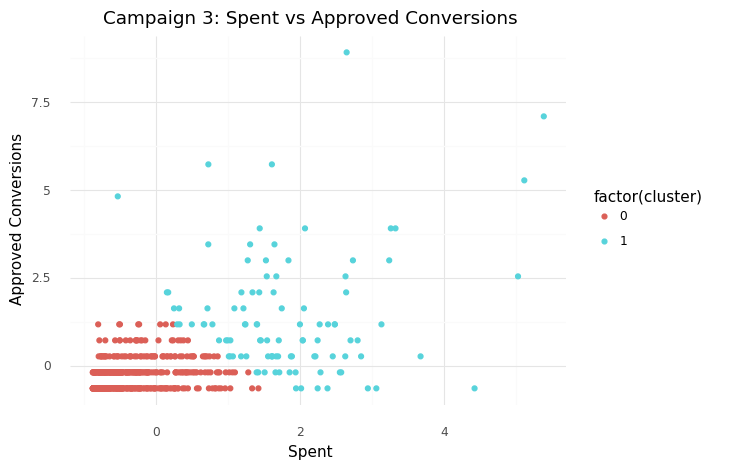

<ggplot: (8749511173916)>

In [ ]:
#campaign 3: spent and approved conversions

#K-means
features = ["Spent", "Approved_Conversion"]
X = campaign_3[features]

#z-score
z = StandardScaler()
X[features] = z.fit_transform(X[features])

#model
km = KMeans(n_clusters = 2)
km.fit(X[features])

#adding that to data frame
membership = km.predict(X[features])
X["cluster"] = membership

#plot
(ggplot(X, aes(x = "Spent", y = "Approved_Conversion", color = "factor(cluster)"))
+ geom_point()
+ theme_minimal()
+ labs(title = "Campaign 3: Spent vs Approved Conversions",
       y = "Approved Conversions"))

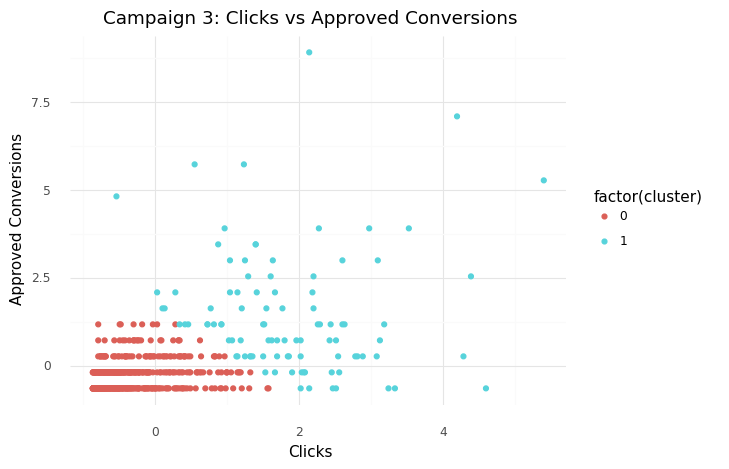

<ggplot: (8749511185709)>

In [ ]:
#campaign 3: clicks and total conversions

#K-means
features = ["Clicks", "Approved_Conversion"]
X = campaign_3[features]

#z-score
z = StandardScaler()
X[features] = z.fit_transform(X[features])

#model
km = KMeans(n_clusters = 2)
km.fit(X[features])

#adding that to data frame
membership = km.predict(X[features])
X["cluster"] = membership

#plot
(ggplot(X, aes(x = "Clicks", y = "Approved_Conversion", color = "factor(cluster)"))
+ geom_point()
+ theme_minimal()
+ labs(title = "Campaign 3: Clicks vs Approved Conversions",
       y = "Approved Conversions"))


These result are kind of what I expected, as it make intuitive sense that the higher budget you have for creating an ad, the more successful it will be and also the more people that actually click on an ad, the more successful it will be in terms of how many people become active users. This highlights that designing ads to especially generate clicks is important in regards to how successful they will be. Additionally in relation to amount spent on the ads, results highlight how when creating an overall budget for a business, a considerable amount should be allocated to advertising if you want to generate more active users for your app/product. These two insights can used in conjunction by the business as it shows that if your aim is to generate new active users, you should allocate a significant amount of your budget to advertising, and within this amount, a significant emphasis in the design process for the ads should be specifically aimed at generating clicks.

##Question 3:
What are the most important features when predicting total_conversion for our ad campaigns using regularization methods?

####Question Change
I originally had this question predicting Approved_conversion, but because Approved_conversion is so highly screwed to the right with some campaigns only having either 0 -2 conversions, the predictive power of my model was very poor. Total_conversion has a much better distribution so I switched to predicting this outcome. I also removed the campaign_id because my other two group members are doing questions that are more specific to each campaign.

In [ ]:
predictors3 = ['gender', 'Clicks', 'Spent', "age_30-34",	"age_35-39",	"age_40-44",	"age_45-49", "Impressions"]

cont3 = ['Clicks', 'Spent',"Impressions"]


X3 = data[predictors3]
y3 = data["Total_Conversion"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state = 100)

In [ ]:
lr3 = LinearRegression()

z3 = StandardScaler()

X_train3[cont3] = z3.fit_transform(X_train3[cont3])
X_test3[cont3] = z3.transform(X_test3[cont3])

X_train3.head()

lr3.fit(X_train3,y_train3)

R2_Train1 = r2_score(y_train3, lr3.predict(X_train3))
R2_Test1 = r2_score(y_test3, lr3.predict(X_test3))

print("R2 train: ",R2_Train1)
print("R2 test: ",R2_Test1)

print("TRAIN MAE: ", mean_absolute_error(y_train3, lr3.predict(X_train3)))
print("TEST MAE: ", mean_absolute_error(y_test3, lr3.predict(X_test3)))

R2 train:  0.7514955396593037
R2 test:  0.6668669698050498
TRAIN MAE:  1.1960917755905298
TEST MAE:  1.2496576938538744


In [ ]:
coef = pd.DataFrame({"Coefs": lr3.coef_ ,
                     "Names": predictors3})

coef

,Coefs,Names
0,0.429045,gender
1,0.241612,Clicks
2,-5.284583,Spent
3,0.454615,age_30-34
4,-0.066324,age_35-39
5,-0.185835,age_40-44
6,-0.202456,age_45-49
7,8.581659,Impressions


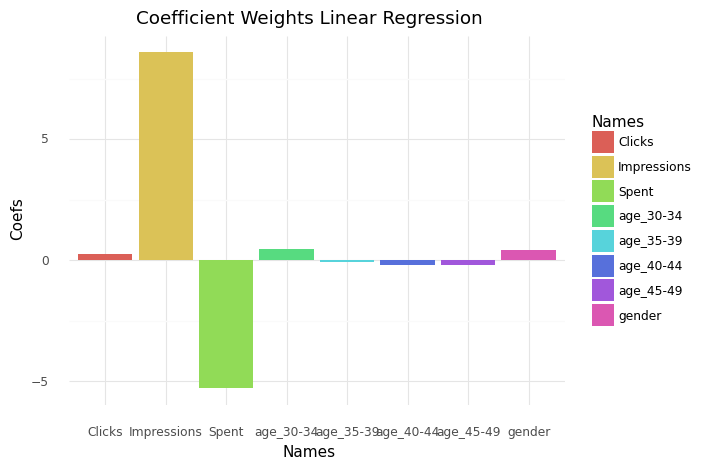

<ggplot: (8749511207336)>

In [ ]:
(ggplot(coef, aes(x = "Names", y = "Coefs", fill = "Names" )) + geom_bar(stat = "identity") + theme_minimal() +
 labs(title = "Coefficient Weights Linear Regression")
)

###Assesing model performance
Overall this model is doing pretty well. We can see that the R2 value is about 0.75 for the training set which means that about 75% of the variance is being accounted for in the model. However, there is some slight overfitting which can be seen by the difference between the R2 value for the train and the test set. The model could be improved so that there is less overfitting. The MAE is pretty good (1.2 for train, 1.25 for test) considering that total conversion ranges from 0 - 33. So on average, our model is off by one conversion which is not too bad. However, it is important to note that our data is strongly scewed right and Total_conversion tends to be very low with only a few instances of high conversion. So based on the distribution of our data, this could be more problematic in real world scenarios if we are off by one.



In [ ]:
lsr = Lasso()

z = StandardScaler()

X_train3[cont3] = z.fit_transform(X_train3[cont3])
X_test3[cont3] = z.transform(X_test3[cont3])

lsr.fit(X_train3,y_train3)

R2_Train2 = r2_score(y_train3, lsr.predict(X_train3))
R2_Test2 = r2_score(y_test3, lsr.predict(X_test3))

print("R2 train: ",R2_Train2)
print("R2 test: ",R2_Test2)

print("TRAIN: ", mean_absolute_error(y_train3, lsr.predict(X_train3)))
print("TEST : ", mean_absolute_error(y_test3, lsr.predict(X_test3)))

R2 train:  0.6203664349836138
R2 test:  0.5586842538355479
TRAIN:  1.3335094674375996
TEST :  1.3738739760458887


In [ ]:
coef2 = pd.DataFrame({"Coefs": lsr.coef_ ,
                     "Names": predictors3})

coef2

,Coefs,Names
0,-0.000000,gender
1,0.000000,Clicks
2,0.000000,Spent
3,0.000000,age_30-34
4,-0.000000,age_35-39
5,-0.000000,age_40-44
6,-0.000000,age_45-49
7,2.659495,Impressions


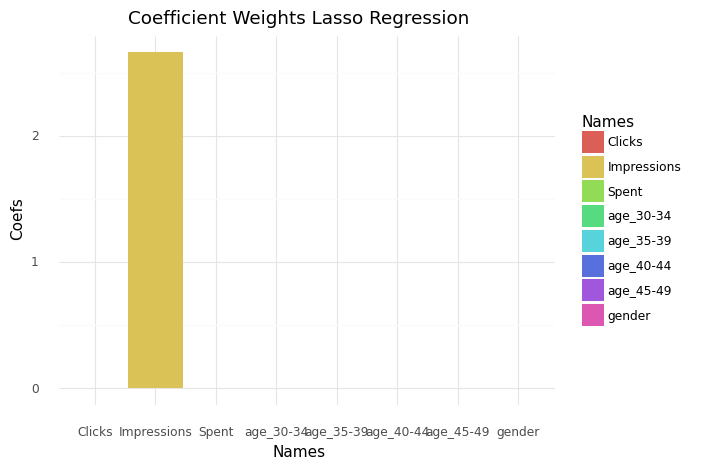

<ggplot: (8749508510069)>

In [ ]:
(ggplot(coef2, aes(x = "Names", y = "Coefs", fill = "Names" )) + geom_bar(stat = "identity") + theme_minimal() +
 labs(title = "Coefficient Weights Lasso Regression")
)

###Assesing model performance
Overall this model is not doing as well as the linear regression model. We can see that the R2 value is 0.62 for the training set which means that only 62% of the variance is being accounted for in the model. However, the overfitting is slightly less than the linear regression model ,with about a 6% different between the train and the test data compared to 9% for the linear regression. The MAE did increase a little bit. This makes sense because there is a lot of information missing in the lasso model due to the fact that all other coefficients except for impressions was pulled down to zero. However, there is very high correlation between Impressions, Spent, and Clicks. So while Spent and Clicks were pulled down to zero, a lot of the information contained in these predictors is still reflected in Impressions. So even with the absence of all other variables, the model doesn't do too bad of a job and accounts for more variation than a model that randomly predicts. However, you would still probably want to use a different model.

In [ ]:
lsr_tune = LassoCV(cv = 5, alphas = [0.1]).fit(X_train3,y_train3)

R2_Train_tune = r2_score(y_train3, lsr_tune.predict(X_train3))
R2_Test_tune = r2_score(y_test3, lsr_tune.predict(X_test3))

lsr_tune.fit(X_train3,y_train3)

print("\nwe chose " + str(lsr_tune.alpha_) + " as our alpha.")

print("R2 train: ",R2_Train_tune)
print("R2 test: ",R2_Test_tune)

print("TRAIN: ", mean_absolute_error(y_train3, lsr_tune.predict(X_train3)))
print("TEST : ", mean_absolute_error(y_test3, lsr_tune.predict(X_test3)))


we chose 0.1 as our alpha.
R2 train:  0.7191371026575539
R2 test:  0.657475816604568
TRAIN:  1.2381102928499297
TEST :  1.2767444564196095


In [ ]:
coeft = pd.DataFrame({"Coefs": lsr_tune.coef_ ,
                     "Names": predictors3})

coeft

,Coefs,Names
0,0.000000,gender
1,-1.262575,Clicks
2,-0.000000,Spent
3,0.653259,age_30-34
4,0.000000,age_35-39
5,-0.000000,age_40-44
6,-0.072514,age_45-49
7,4.785018,Impressions


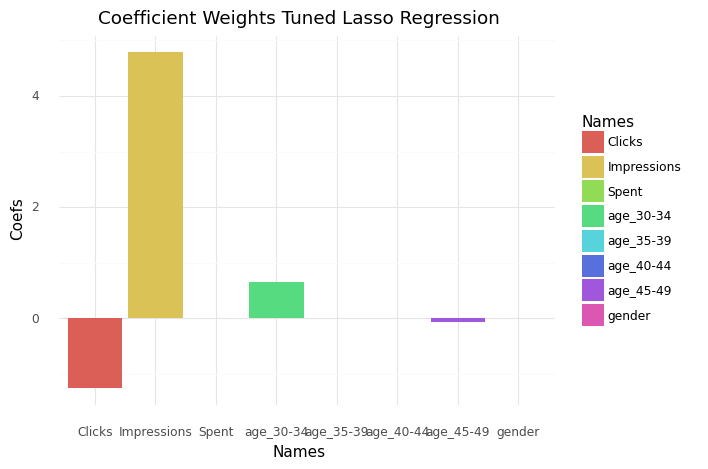

<ggplot: (8749511475681)>

In [ ]:
(ggplot(coeft, aes(x = "Names", y = "Coefs", fill = "Names" )) + geom_bar(stat = "identity") + theme_minimal() +
  labs(title = "Coefficient Weights Tuned Lasso Regression")
)

###Assessing Model Performance
With an alpha of 0.1, the model is performing a lot better than the original lasso regression. With a smaller penalty, fewer of the coefficient values are pulled all the way down to zero and less information is lost. The R2 values increased and the MAE decreased to near the levels of the linear regression model. There is also less overfitting than the liner regression model with about a 6% difference between the train and the test data compared to the 9% for the liner regression model. Again, it is important to note the relationship between clicks and impressions. We can see that clicks has a negative coefficient but it is know that it has a positive relationship with Total_conversion. This it due to the fact that it is also really highly correlated with impressions, so the high impressions coefficient contains a lot of the information for the clicks variable as well. We can also see that gender from age 30-34 is an influential variable and if someone is in this age range, they are more likely to have higher conversion rates. Same with age 45-49, but it is correlated with lower rates.

In [ ]:
rr = Ridge()

rr.fit(X_train3,y_train3)

R2_Train3 = r2_score(y_train3, rr.predict(X_train3))
R2_Test3 = r2_score(y_test3, rr.predict(X_test3))

print("R2 train: ",R2_Train3)
print("R2 test: ",R2_Test3)

print("TRAIN: ", mean_absolute_error(y_train3, rr.predict(X_train3)))
print("TEST : ", mean_absolute_error(y_test3, rr.predict(X_test3)))

R2 train:  0.7510422049179495
R2 test:  0.6673660024835084
TRAIN:  1.2001742912271434
TEST :  1.247782802640643


In [ ]:
coef3 = pd.DataFrame({"Coefs": rr.coef_ ,
                     "Names": predictors3})

coef3

,Coefs,Names
0,0.445576,gender
1,-0.484535,Clicks
2,-4.099272,Spent
3,0.488753,age_30-34
4,-0.059107,age_35-39
5,-0.188252,age_40-44
6,-0.241394,age_45-49
7,8.112890,Impressions


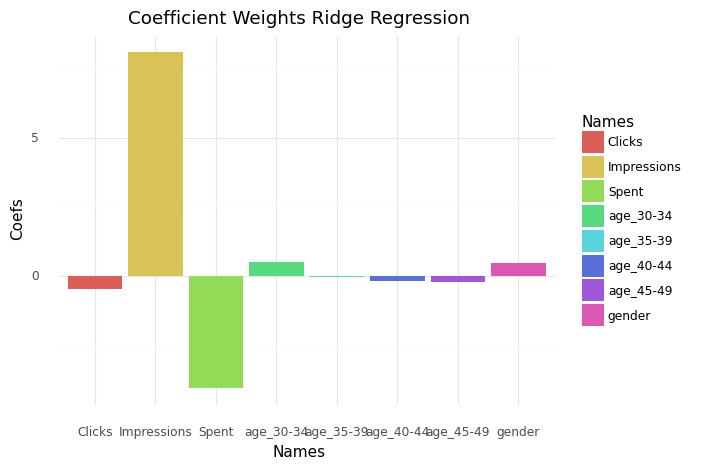

<ggplot: (8749511155541)>

In [ ]:
(ggplot(coef3, aes(x = "Names", y = "Coefs", fill = "Names" )) + geom_bar(stat = "identity") + theme_minimal() +
 labs(title = "Coefficient Weights Ridge Regression")
)

###Model Performance
The ridge regression model looks very similar to the linear regression model, which is to be expected considering that it doesn't pull the coefficients all the way down to zero and many of them are very low already. The R2 scores and the MAE are nearly identical to the linear regression model as well. We can also see by the coefficient values that impressions, spent, and ages between 30-34 and 45-45 are have the coefficients with the largest magnitiude, meaning that they have the largest predictive power on the outcome variable, Total_conversion.

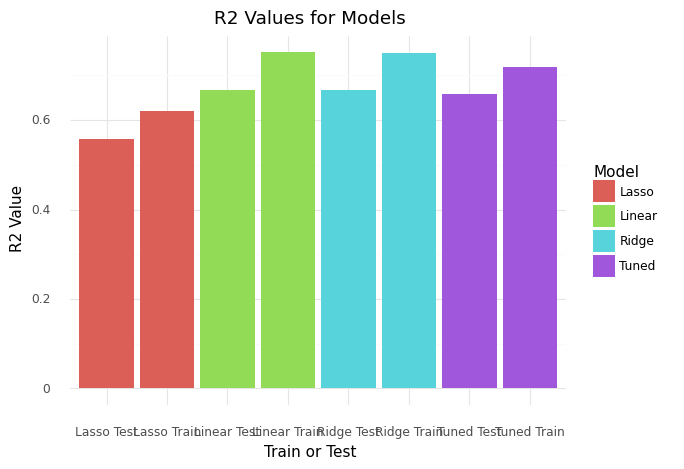

<ggplot: (8749511599228)>

In [ ]:
Scored_arr = [R2_Train1, R2_Train2, R2_Train_tune, R2_Train3, R2_Test1, R2_Test2, R2_Test_tune, R2_Test3]
Names1 = ["Linear Train", "Lasso Train", "Tuned Train", "Ridge Train", "Linear Test", "Lasso Test", "Tuned Test","Ridge Test"]
Model = ["Linear", "Lasso", "Tuned","Ridge", "Linear", "Lasso", "Tuned", "Ridge"]

R2 = pd.DataFrame({"R2 Value": Scored_arr,
                     "Train or Test": Names1,
                   "Model": Model})

(ggplot(R2, aes(x = "Train or Test", y = "R2 Value", fill = "Model" )) + geom_bar(stat = "identity") + theme_minimal() +
 labs(title = "R2 Values for Models"))

##Final Assessment
Based on the graph about, when looking at the train and the test R2 scores for each of the four models, we can see that Lasso did the worst. It was the lowest scores for both the train and the test data and there is still some overfitting. It is important to note that overfitting was present in all of the models, but the R2 values for the Ridge, Tuned Lasso, and Linear were much higher than for the Lasso model. Overall, I would probably choose to use the tuned Lasso model. It had the smallest amount of overfitting with a 6% difference, and I think that it did a good job of selecting the most important variables. While there was some variation in which predictors had the highest coefficient values, the overall trend was that the most influential predictors are Impressions, spent, click, and age 30-34. These variables consistently showed up in the four models, or were accounted for in some way by one of the other variables with a large cofficient. An increase in any of these predictors correlates with a significant postitive or negative change in Total_conversion. For real world application, this is useful to know because ad campaigns can be better targested to specific audiences. Also, we can see that impressions is very influential and the more impressions there are, the more conversions.


#Question 4:
Using a linear regression model, how does age ,gender , campaign_id,interest, impressions, and spent, and Approved_Conversion affect the predicted number of clicks?



In [ ]:
predictors4 = ["xyz_campaign_id_916",	"xyz_campaign_id_936",	"xyz_campaign_id_1178",
              "age_30-34",	"age_35-39",	"age_40-44",	"age_45-49", 'gender',
              'Approved_Conversion', 'Impressions', 'Spent']
cont4 = ['Approved_Conversion', 'Impressions', 'Spent']

X4 = data[predictors4]
y4 = data["Clicks"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state = 100)

In [ ]:
lr = LinearRegression()

z = StandardScaler()

X_train4[cont4] = z.fit_transform(X_train4[cont4])
X_test4[cont4] = z.transform(X_test4[cont4])

X_train4.head()

lr.fit(X_train4,y_train4)

R2_Train = r2_score(y_train4, lr.predict(X_train4))
R2_Test = r2_score(y_test4, lr.predict(X_test4))

print("R2 train: ",R2_Train)
print("R2 test: ",R2_Test)

print("TRAIN MAE: ", mean_absolute_error(y_train4, lr.predict(X_train4)))
print("TEST MAE: ", mean_absolute_error(y_test4, lr.predict(X_test4)))

R2 train:  0.9903180133317934
R2 test:  0.992898510156641
TRAIN MAE:  3.376376162472648
TEST MAE:  3.345831058951965


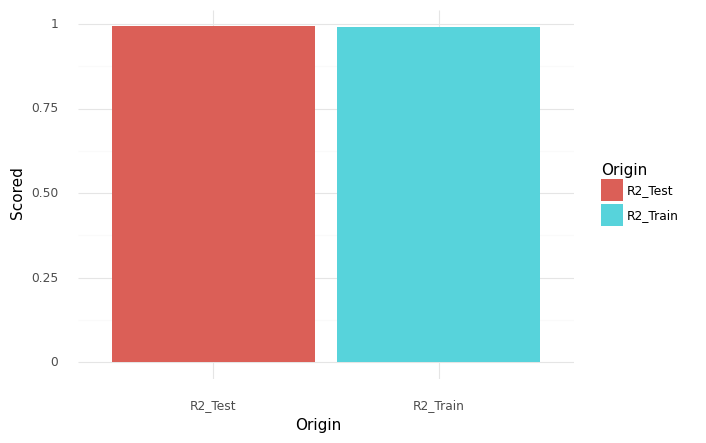

<ggplot: (8749508512513)>

In [ ]:
index = [1]
R_arr = [R2_Train, R2_Test]
Names2 = ["R2_Train", "R2_Test"]

R2 = pd.DataFrame({"Scored": R_arr,
                     "Origin": Names2})

(ggplot(R2, aes(x = "Origin", y = "Scored", fill = "Origin" )) + geom_bar(stat = "identity") + theme_minimal() )

In [ ]:
coef = pd.DataFrame({"Coefs": lr.coef_,
                     "Names": predictors4})

coef

,Coefs,Names
0,-1.137938e+13,xyz_campaign_id_916
1,-1.137938e+13,xyz_campaign_id_936
2,-1.137938e+13,xyz_campaign_id_1178
3,7.340457e+13,age_30-34
4,7.340457e+13,age_35-39
5,7.340457e+13,age_40-44
6,7.340457e+13,age_45-49
7,4.096924e+00,gender
8,-3.491211e-01,Approved_Conversion
9,-1.358789e+01,Impressions


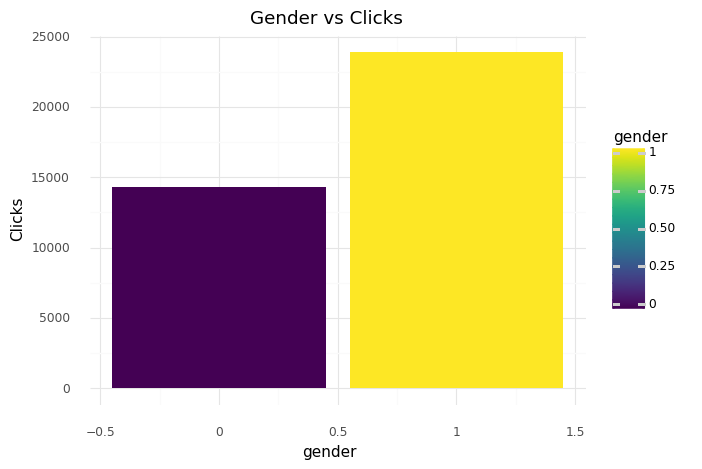

<ggplot: (8749508429608)>

In [ ]:
(ggplot(data, aes(x = "gender", y = "Clicks", fill = "gender" )) + geom_bar(stat = "identity") + theme_minimal() +
 labs(title = "Gender vs Clicks ")
)

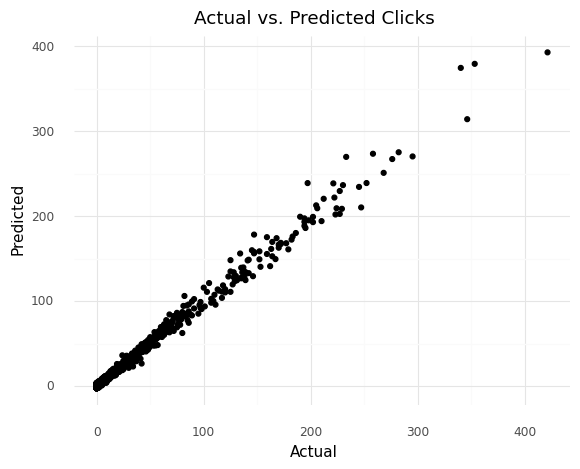

<ggplot: (8749508333403)>

In [ ]:
results2 = pd.DataFrame({"Actual": y_train4,
                     "Predicted": lr.predict(X_train4)})



(ggplot(results2, aes(x = "Actual", y = "Predicted")) + geom_point() + theme_minimal()) + labs(title = "Actual vs. Predicted Clicks")

##Model Assessment
Overall, the predictors are doing an very good job at predicting the outcome variable, number of clicks. We can see that The R2 value for the test and the train data is 99% which means that nearly all of the variation in the data is explained by the model. I wouldn't classify the model as being overfit because the train and the test scores are so similar. Also, the MAE is just above 3 for the train and the test data which is also very good considering that the number of clicks in the dataset ranges from 0-433. I also wanted to point out that gender has the largest coefficient and is the most influential variable in predicting the number of clicks. As shown by bar chart, we can see that women tend to click on an ad more frequently than men. This can help ad agencies target their ads more effectively. Finally, the scatterplot printed above is a great visualization to show how close the predictied and actual results are. The line comparing actual vs predicted is almost perfectly linear with a slope of one, showing that the actual and predicted values are nearly the same and that our model is very successful in prediciting the number of clicks given the predictors.

# Question 5:
When considering Spent, Clicks, and Impressions what clusters emerge and what characterizes these clusters?

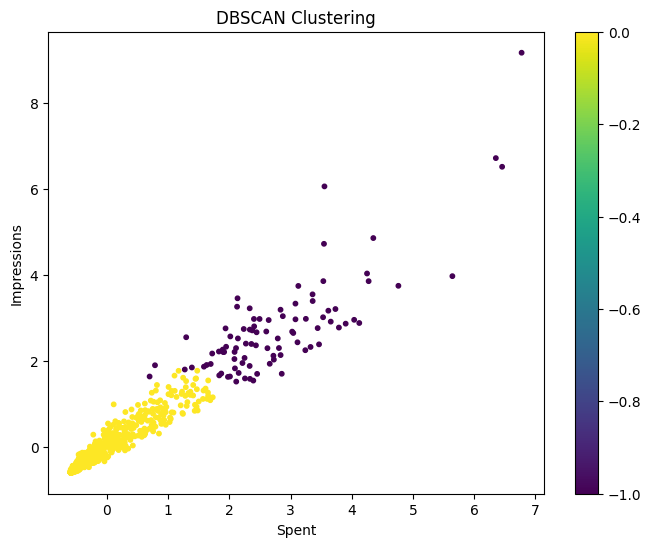

Cluster 0 points:  1052
Cluster 0 centroid:  [-0.24087937 -0.23926622 -0.2389398 ]
Noise points:  91


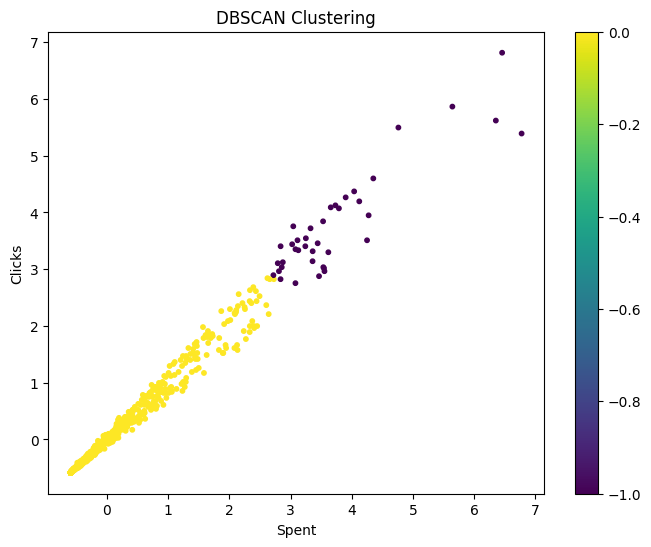

Cluster 0 points:  1104
Cluster 0 centroid:  [-0.13185106 -0.13360219]
Noise points:  39


In [ ]:
# Extract relevant columns
X = data[['Spent', 'Impressions', 'Clicks']]

# Standardize the columns using Z-score normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Cluster the data using DBSCAN
db = DBSCAN(eps=0.5, min_samples=25)
labels = db.fit_predict(X)

# Plot the clusters
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s = 10)
plt.xlabel('Spent')
plt.ylabel('Impressions')
plt.title('DBSCAN Clustering')
plt.colorbar(scatter, ax=ax)
plt.show()

# Print cluster statistics
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        # Noise points
        print('Noise points: ', len(X[labels == label]))
    else:
        # Cluster points
        print('Cluster', label, 'points: ', len(X[labels == label]))
        print('Cluster', label, 'centroid: ', np.mean(X[labels == label], axis=0))


# Extract relevant columns
X = data[['Spent', 'Clicks']]

# Standardize the columns using Z-score normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Cluster the data using DBSCAN
db = DBSCAN(eps=0.5, min_samples=25)
labels = db.fit_predict(X)

# Plot the clusters
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
plt.xlabel('Spent')
plt.ylabel('Clicks')
plt.title('DBSCAN Clustering')
plt.colorbar(scatter, ax=ax)
plt.show()

# Print cluster statistics
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        # Noise points
        print('Noise points: ', len(X[labels == label]))
    else:
        # Cluster points
        print('Cluster', label, 'points: ', len(X[labels == label]))
        print('Cluster', label, 'centroid: ', np.mean(X[labels == label], axis=0))


The two graphs generated from the DBSCAN clustering analysis provide valuable insights into the dataset. The first graph represents the relationship between "Spent" and "Impressions”, revealing the distinct clusters of data points with similar spending and impressions patterns. Each cluster is represented by a unique color, allowing us to identify groups of data points that depict similar relationships between the amount spent and the number of impressions generated. The first graph permits the audience to observe patterns and variations in spending and impressions of data, facilitating a deeper understanding of how spending a certain amount correlates to higher or lower amount of impressions. The second graph depicts the relationship between "Spent" and "Clicks". These two graphs provide visual representations of the relationships between spending, impressions, and clicks. They offer a detailed visual for the relationship between the amount being spent on ads, and the resulting clicks or impressions that come from it. Similarly, these graphs allow for the identification of patterns and trends that can inform decision-making and strategy development in advertising campaigns. These two graphs can be exceptionally beneficial to those examining the relationship betweens ads, and actual users and can potentially have long term benefits for companies.

##Question 6:
Using a decision (regression) tree to predict, which campaigns are most successful in getting the targeted audience engaging with ads?

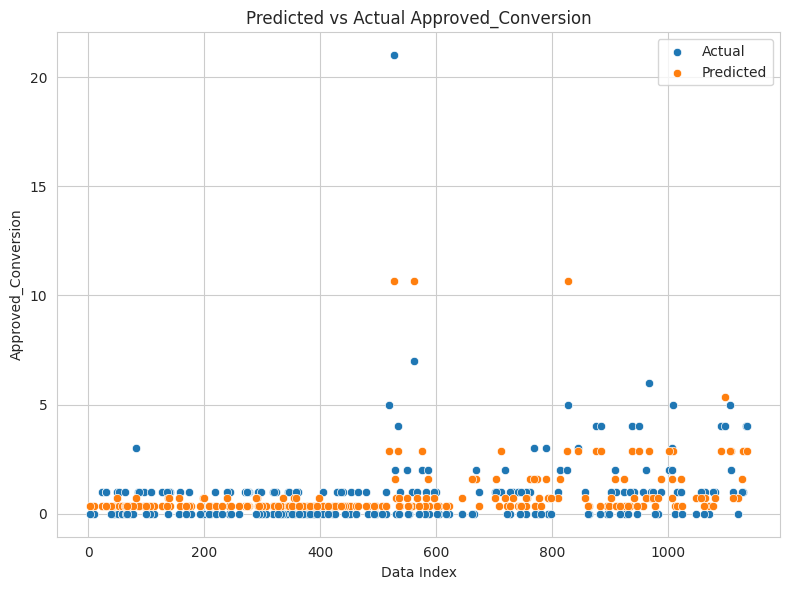

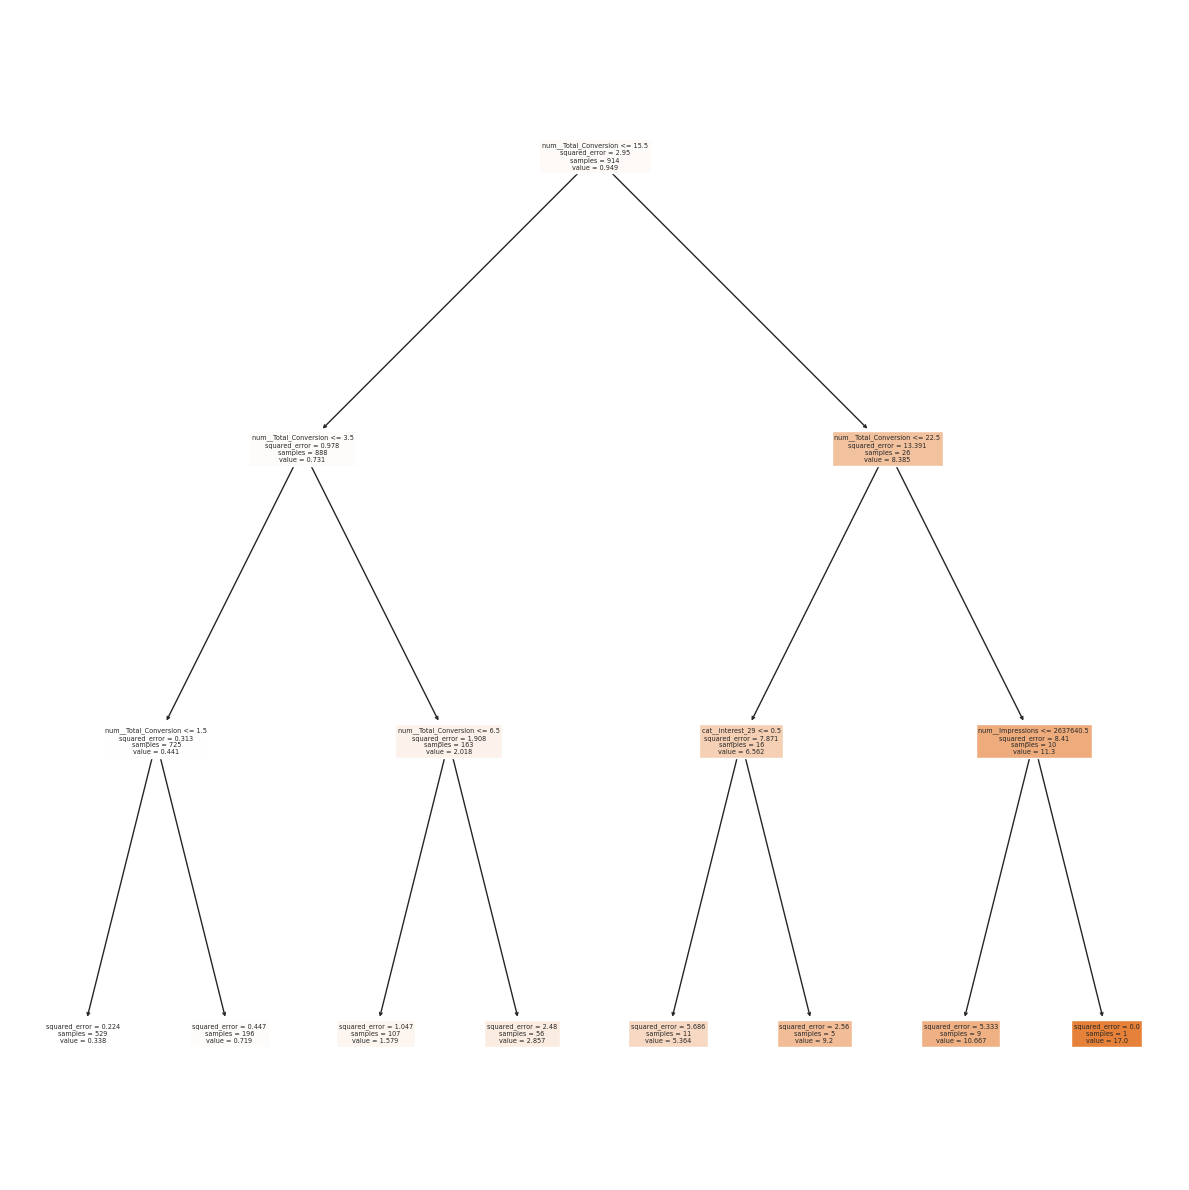

In [ ]:


# Split the data into training and testing sets, using 80% of the data for training
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the relevant variables as predictors and the engagement rate as the target variable
categorical_cols = ["xyz_campaign_id_916", "xyz_campaign_id_936", "xyz_campaign_id_1178", 'fb_campaign_id',
                    "age_30-34", "age_35-39", "age_40-44", "age_45-49", 'gender', 'interest']
numerical_cols = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion']
target_col = 'Approved_Conversion'

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)])

# Fit and transform the training data
X_train = preprocessor.fit_transform(train_data)
y_train = train_data[target_col]

# Train a decision tree model on the training set
model = DecisionTreeRegressor(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Transform the testing data
X_test = preprocessor.transform(test_data)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Create a scatter plot of the predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=test_data, x=test_data.index, y=target_col, label='Actual')
sns.scatterplot(data=test_data, x=test_data.index, y=y_pred, label='Predicted')
plt.xlabel('Data Index')
plt.ylabel('Approved_Conversion')
plt.title('Predicted vs Actual Approved_Conversion')
plt.legend()
plt.tight_layout()
plt.show()

# Print out the tree diagram
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(model, feature_names=preprocessor.get_feature_names_out(), filled=True, ax=ax)
plt.tight_layout()
plt.show()


The scatter plot depicts the relationship between the actual and predicted Approved_Conversion values. By comparing the position and closeness of the points, users can assess the accuracy of the model's predictions. A tight cluster along a diagonal line indicates good alignment between predictions and actual values, while scattered points suggest larger prediction errors. Here, the scatter plot is helping users understand the model's performance, identify biases, and evaluate its overall effectiveness in estimating the Approved_Conversion after the ads.


 The decison tree model provides insights into the decision-making process of the model and how different features contribute to the predictions. To interpret the tree diagram, start by looking at the root node and follow the branches that correspond to the outcome of the split. At each node, the value in the box represents the predicted value of the target variable for the subset of data that satisfies the decision rule.

 I chose to include a scatterplot because I feel they are far more user friendly and intuitive than decison trees. I wanted to ensure that users could fully comprehend what the graph was saying, even if they do not have a Data Science background.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')


!cp "drive/My Drive/Colab Notebooks/CPSC 392 final project analysis.ipynb" ./
!jupyter nbconvert --to PDF "CPSC 392 final project analysis.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g